# Tutorial 2 - RNN Time Series

In this notebook, we will predict the weather temperature. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [2]:
import pandas as pd

walmart = pd.read_csv('walmart data.csv')

walmart.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,152.119995,153.089996,151.860001,153.070007,151.872665,2925800
1,2022-11-28,152.720001,154.639999,152.720001,153.509995,152.309219,5891600
2,2022-11-29,153.029999,153.710007,152.550003,152.970001,151.773438,4613900
3,2022-11-30,152.610001,152.770004,151.199997,152.419998,151.227737,10446000
4,2022-12-01,152.050003,153.610001,150.729996,153.369995,152.170303,7577400


In [3]:
walmart

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,152.119995,153.089996,151.860001,153.070007,151.872665,2925800
1,2022-11-28,152.720001,154.639999,152.720001,153.509995,152.309219,5891600
2,2022-11-29,153.029999,153.710007,152.550003,152.970001,151.773438,4613900
3,2022-11-30,152.610001,152.770004,151.199997,152.419998,151.227737,10446000
4,2022-12-01,152.050003,153.610001,150.729996,153.369995,152.170303,7577400
...,...,...,...,...,...,...,...
95,2023-04-14,149.029999,149.889999,148.149994,148.479996,148.479996,3488300
96,2023-04-17,148.639999,149.669998,148.500000,149.520004,149.520004,5388900
97,2023-04-18,149.779999,150.339996,149.440002,149.850006,149.850006,4494100
98,2023-04-19,150.839996,151.410004,149.770004,150.009995,150.009995,4144500


In [4]:
#Drop the columns we don't need

walmart = walmart.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [5]:
walmart

,Date,Close
0,2022-11-25,153.070007
1,2022-11-28,153.509995
2,2022-11-29,152.970001
3,2022-11-30,152.419998
4,2022-12-01,153.369995
...,...,...
95,2023-04-14,148.479996
96,2023-04-17,149.520004
97,2023-04-18,149.850006
98,2023-04-19,150.009995


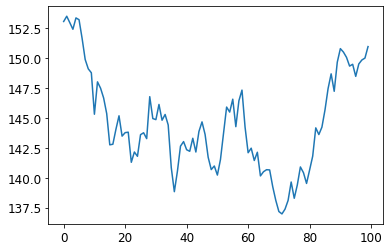

In [6]:
#Plot temp

plt.plot(walmart['Close'])
plt.show()

# Data Cleanup

In [7]:
# Remove all null values

walmart = walmart.dropna().reset_index(drop=True)

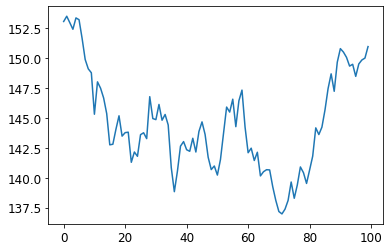

In [8]:
plt.plot(walmart['Close'])
plt.show()

## RESHAPE the data set!

In [9]:
walmart.shape

(100, 2)

In [10]:
# Note that not all days have 24 readings. Some are missing.

walmart.shape[0]/10

10.0

In [11]:
walmart.groupby(['Date']).count()

,Close
Date,
2022-11-25,1
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
...,...
2023-04-14,1
2023-04-17,1
2023-04-18,1


In [12]:
# Re-organize the data set by day and hours

temp = np.array(walmart['Close']).reshape(10,10)

temp

array([[153.070007, 153.509995, 152.970001, 152.419998, 153.369995,
        153.220001, 151.649994, 149.889999, 149.110001, 148.779999],
       [145.309998, 148.020004, 147.490005, 146.669998, 145.360001,
        142.75    , 142.800003, 144.050003, 145.179993, 143.479996],
       [143.770004, 143.809998, 141.289993, 142.149994, 141.789993,
        143.600006, 143.759995, 143.270004, 146.779999, 144.949997],
       [144.860001, 146.130005, 144.809998, 145.289993, 144.410004,
        140.839996, 138.830002, 140.539993, 142.639999, 143.020004],
       [142.339996, 142.210007, 143.300003, 142.149994, 143.869995,
        144.669998, 143.619995, 141.710007, 140.679993, 140.979996],
       [140.220001, 141.520004, 143.720001, 145.910004, 145.490005,
        146.570007, 144.270004, 146.440002, 147.330002, 144.240005],
       [142.089996, 142.470001, 141.440002, 142.130005, 140.149994,
        140.5     , 140.669998, 140.649994, 139.25    , 138.100006],
       [137.169998, 136.970001, 137.36999

In [13]:
# Convert to dataframe

temp_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,153.070007,153.509995,152.970001,152.419998,153.369995,153.220001,151.649994,149.889999,149.110001,148.779999
1,145.309998,148.020004,147.490005,146.669998,145.360001,142.750000,142.800003,144.050003,145.179993,143.479996
2,143.770004,143.809998,141.289993,142.149994,141.789993,143.600006,143.759995,143.270004,146.779999,144.949997
3,144.860001,146.130005,144.809998,145.289993,144.410004,140.839996,138.830002,140.539993,142.639999,143.020004
4,142.339996,142.210007,143.300003,142.149994,143.869995,144.669998,143.619995,141.710007,140.679993,140.979996
5,140.220001,141.520004,143.720001,145.910004,145.490005,146.570007,144.270004,146.440002,147.330002,144.240005
6,142.089996,142.470001,141.440002,142.130005,140.149994,140.500000,140.669998,140.649994,139.250000,138.100006
7,137.169998,136.970001,137.369995,138.100006,139.639999,138.279999,139.399994,140.899994,140.419998,139.520004
8,140.649994,141.800003,144.169998,143.610001,144.229996,145.669998,147.449997,148.690002,147.229996,149.669998
9,150.800003,150.509995,150.070007,149.339996,149.490005,148.479996,149.520004,149.850006,150.009995,150.970001


# Reshape for Standardizing Data

In [14]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(100, 1)

In [15]:
temp_1feature

array([[153.070007],
       [153.509995],
       [152.970001],
       [152.419998],
       [153.369995],
       [153.220001],
       [151.649994],
       [149.889999],
       [149.110001],
       [148.779999],
       [145.309998],
       [148.020004],
       [147.490005],
       [146.669998],
       [145.360001],
       [142.75    ],
       [142.800003],
       [144.050003],
       [145.179993],
       [143.479996],
       [143.770004],
       [143.809998],
       [141.289993],
       [142.149994],
       [141.789993],
       [143.600006],
       [143.759995],
       [143.270004],
       [146.779999],
       [144.949997],
       [144.860001],
       [146.130005],
       [144.809998],
       [145.289993],
       [144.410004],
       [140.839996],
       [138.830002],
       [140.539993],
       [142.639999],
       [143.020004],
       [142.339996],
       [142.210007],
       [143.300003],
       [142.149994],
       [143.869995],
       [144.669998],
       [143.619995],
       [141.7

## Standardize the values

In [16]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

## Reshape the data back to 24-hour format

In [17]:
temp_reshaped = temp_std.reshape(10,10)

temp_reshaped.shape

(10, 10)

In [18]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,2.076750,2.183911,2.052394,1.918439,2.149813,2.113282,1.730902,1.302251,1.112281,1.031908
1,0.186780,0.846809,0.717726,0.518012,0.198958,-0.436714,-0.424536,-0.120095,0.155117,-0.258922
2,-0.188289,-0.178549,-0.792303,-0.582847,-0.670526,-0.229693,-0.190727,-0.310066,0.544803,0.099101
3,0.077182,0.386495,0.065004,0.181908,-0.032416,-0.901900,-1.391440,-0.974967,-0.463505,-0.370954
4,-0.536572,-0.568231,-0.302759,-0.582847,-0.163936,0.030906,-0.224825,-0.690007,-0.940870,-0.867803
5,-1.052902,-0.736283,-0.200468,0.332913,0.230621,0.493659,-0.066513,0.461995,0.678757,-0.073819
6,-0.597460,-0.504909,-0.755767,-0.587715,-1.069952,-0.984707,-0.943304,-0.948176,-1.289148,-1.569232
7,-1.795738,-1.844448,-1.747028,-1.569232,-1.194163,-1.525394,-1.252617,-0.887288,-1.004192,-1.223388
8,-0.948176,-0.668088,-0.090870,-0.227259,-0.076257,0.274459,0.707982,1.009989,0.654401,1.248669
9,1.523885,1.453253,1.346093,1.168297,1.204832,0.958841,1.212138,1.292511,1.331476,1.565288


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [19]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(temp_reshaped)*0.7)
train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [20]:
train.shape

(7, 10)

In [21]:
train

array([[ 2.07675032,  2.18391053,  2.0523936 ,  1.91843895,  2.14981317,
         2.11328175,  1.73090249,  1.30225116,  1.11228063,  1.03190779],
       [ 0.18678008,  0.84680904,  0.71772642,  0.51801159,  0.19895844,
        -0.43671405, -0.42453569, -0.12009496,  0.15511703, -0.25892164],
       [-0.18828944, -0.1785488 , -0.79230252, -0.58284706, -0.67052623,
        -0.22969289, -0.19072716, -0.31006573,  0.54480262,  0.09910091],
       [ 0.07718215,  0.3864949 ,  0.06500379,  0.18190781, -0.03241578,
        -0.90190046, -1.39143969, -0.97496696, -0.46350508, -0.37095388],
       [-0.53657158, -0.56823074, -0.3027594 , -0.58284706, -0.16393637,
         0.03090643, -0.22482452, -0.69000703, -0.9408696 , -0.8678031 ],
       [-1.05290184, -0.73628275, -0.2004678 ,  0.33291309,  0.23062125,
         0.49365853, -0.06651315,  0.46199547,  0.67875727, -0.07381948],
       [-0.59745973, -0.50490853, -0.75576745, -0.58771543, -1.06995223,
        -0.98470736, -0.94330391, -0.94817593

In [22]:
test.shape

(3, 10)

# Create Input and Target values

The first 23 hours will be input to predict the 24th hour reading (i.e., target)

In [23]:
# The first 23 columns (from 0 to 22) are inputs

train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,2.076750,2.183911,2.052394,1.918439,2.149813,2.113282,1.730902,1.302251,1.112281
1,0.186780,0.846809,0.717726,0.518012,0.198958,-0.436714,-0.424536,-0.120095,0.155117
2,-0.188289,-0.178549,-0.792303,-0.582847,-0.670526,-0.229693,-0.190727,-0.310066,0.544803
3,0.077182,0.386495,0.065004,0.181908,-0.032416,-0.901900,-1.391440,-0.974967,-0.463505
4,-0.536572,-0.568231,-0.302759,-0.582847,-0.163936,0.030906,-0.224825,-0.690007,-0.940870
5,-1.052902,-0.736283,-0.200468,0.332913,0.230621,0.493659,-0.066513,0.461995,0.678757
6,-0.597460,-0.504909,-0.755767,-0.587715,-1.069952,-0.984707,-0.943304,-0.948176,-1.289148


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [24]:
train_inputs

array([[ 2.07675032,  2.18391053,  2.0523936 ,  1.91843895,  2.14981317,
         2.11328175,  1.73090249,  1.30225116,  1.11228063],
       [ 0.18678008,  0.84680904,  0.71772642,  0.51801159,  0.19895844,
        -0.43671405, -0.42453569, -0.12009496,  0.15511703],
       [-0.18828944, -0.1785488 , -0.79230252, -0.58284706, -0.67052623,
        -0.22969289, -0.19072716, -0.31006573,  0.54480262],
       [ 0.07718215,  0.3864949 ,  0.06500379,  0.18190781, -0.03241578,
        -0.90190046, -1.39143969, -0.97496696, -0.46350508],
       [-0.53657158, -0.56823074, -0.3027594 , -0.58284706, -0.16393637,
         0.03090643, -0.22482452, -0.69000703, -0.9408696 ],
       [-1.05290184, -0.73628275, -0.2004678 ,  0.33291309,  0.23062125,
         0.49365853, -0.06651315,  0.46199547,  0.67875727],
       [-0.59745973, -0.50490853, -0.75576745, -0.58771543, -1.06995223,
        -0.98470736, -0.94330391, -0.94817593, -1.28914809]])

In [25]:
train_inputs.shape 

(7, 9)

In [26]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [27]:
train_x

array([[[ 2.07675032],
        [ 2.18391053],
        [ 2.0523936 ],
        [ 1.91843895],
        [ 2.14981317],
        [ 2.11328175],
        [ 1.73090249],
        [ 1.30225116],
        [ 1.11228063]],

       [[ 0.18678008],
        [ 0.84680904],
        [ 0.71772642],
        [ 0.51801159],
        [ 0.19895844],
        [-0.43671405],
        [-0.42453569],
        [-0.12009496],
        [ 0.15511703]],

       [[-0.18828944],
        [-0.1785488 ],
        [-0.79230252],
        [-0.58284706],
        [-0.67052623],
        [-0.22969289],
        [-0.19072716],
        [-0.31006573],
        [ 0.54480262]],

       [[ 0.07718215],
        [ 0.3864949 ],
        [ 0.06500379],
        [ 0.18190781],
        [-0.03241578],
        [-0.90190046],
        [-1.39143969],
        [-0.97496696],
        [-0.46350508]],

       [[-0.53657158],
        [-0.56823074],
        [-0.3027594 ],
        [-0.58284706],
        [-0.16393637],
        [ 0.03090643],
        [-0.22482452],
   

## Set the target

In [28]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,1.031908
1,-0.258922
2,0.099101
3,-0.370954
4,-0.867803
5,-0.073819
6,-1.569232


## Repeat for TEST

In [29]:
test.shape

(3, 10)

In [30]:
# The first 23 columns (from 0 to 22) are inputs

test_inputs = test[:,:9]

In [31]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [32]:
# The last column (23) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-1.223388
1,1.248669
2,1.565288


In [33]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 490ms/step - loss: 0.5223
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4979
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4748
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4529
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4326
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4137
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3964
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.3806
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3661
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.3525
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3399
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 0.3283
Epoch 13/100
1/1 [==============================] - 0s 16ms

### Predictions

In [35]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 67ms/step


In [36]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [37]:
comparison

,actual,predicted
0,139.520004,138.660751
1,149.669998,144.295425
2,150.970001,145.927505


In [38]:
MSE_NNN = mean_squared_error(comparison['actual'], comparison['predicted'])

In [39]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Normal NNN', 'MSE':MSE_NNN}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369


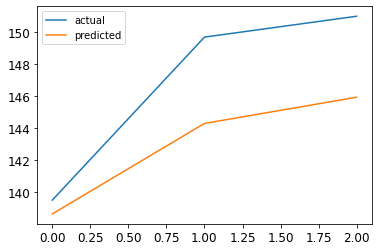

In [40]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [41]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 861ms/step - loss: 1.4553
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 1.3878
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 1.3223
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 1.2568
Epoch 5/30
1/1 [==============================] - 0s 0s/step - loss: 1.1908
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 1.1266
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 1.0649
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 1.0059
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 0.9509
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 0.8989
Epoch 11/30
1/1 [==============================] - 0s 19ms/step - loss: 0.8484
Epoch 12/30
1/1 [==============================] - 0s 13ms/step - loss: 0.8035
Epoch 13/30
1/1 [==============================] - 0s 0s/step - loss: 

### Predictions

In [43]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 117ms/step


In [44]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [45]:
comparison

,actual,predicted
0,139.520004,141.267807
1,149.669998,146.128189
2,150.970001,147.542068


In [46]:
MSE_RNN = mean_squared_error(comparison['actual'], comparison['predicted'])

In [47]:
performance = pd.concat([performance,pd.DataFrame({'model': 'simple RNN', 'MSE':MSE_RNN}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369
0,simple RNN,9.116649


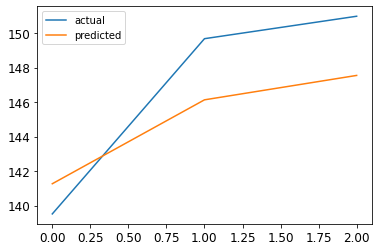

In [48]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7695
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7230
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6845
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6528
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6265
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6031
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.5821
Epoch 8/30
1/1 [==============================] - 0s 0s/step - loss: 0.5622
Epoch 9/30
1/1 [==============================] - 0s 20ms/step - loss: 0.5438
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5263
Epoch 11/30
1/1 [==============================] - 0s 0s/step - loss: 0.5085
Epoch 12/30
1/1 [==============================] - 0s 19ms/step - loss: 0.4915
Epoch 13/30
1/1 [==============================] - 0s 15ms/step - loss: 

### Predictions

In [51]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 217ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
comparison

,actual,predicted
0,139.520004,142.509323
1,149.669998,144.471359
2,150.970001,147.151077


In [54]:
MSE_RNN = mean_squared_error(comparison['actual'], comparison['predicted'])

In [55]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple RNN with more layers', 'MSE':MSE_RNN}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369
0,simple RNN,9.116649
0,Simple RNN with more layers,16.848684


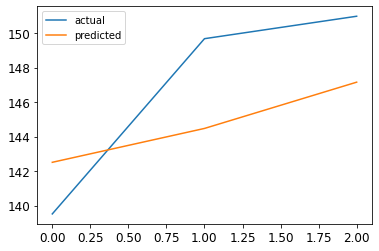

In [56]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [57]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7234
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.7083
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6935
Epoch 4/30
1/1 [==============================] - 0s 0s/step - loss: 0.6789
Epoch 5/30
1/1 [==============================] - 0s 784us/step - loss: 0.6646
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 0.6505
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 0.6368
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6232
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6098
Epoch 10/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5965
Epoch 11/30
1/1 [==============================] - 0s 0s/step - loss: 0.5833
Epoch 12/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5704
Epoch 13/30
1/1 [==============================] - 0s 17ms/step - loss

### Predictions

In [59]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 145ms/step


In [60]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [61]:
comparison

,actual,predicted
0,139.520004,143.520096
1,149.669998,144.905609
2,150.970001,146.702133


In [62]:
MSE_RNN = mean_squared_error(comparison['actual'], comparison['predicted'])

In [63]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM with one layer', 'MSE':MSE_RNN}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369
0,simple RNN,9.116649
0,Simple RNN with more layers,16.848684
0,LSTM with one layer,18.971611


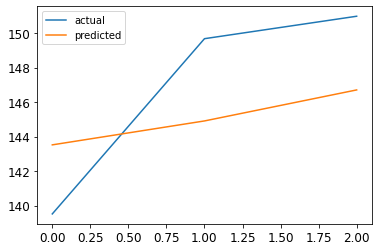

In [64]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [65]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.5646
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5341
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5045
Epoch 4/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4759
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4483
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4216
Epoch 7/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3960
Epoch 8/30
1/1 [==============================] - 0s 15ms/step - loss: 0.3714
Epoch 9/30
1/1 [==============================] - 0s 0s/step - loss: 0.3478
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 0.3254
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.3042
Epoch 12/30
1/1 [==============================] - 0s 1ms/step - loss: 0.2843
Epoch 13/30
1/1 [==============================] - 0s 0s/step - loss:

### Predictions

In [67]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 654ms/step


In [68]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [69]:
comparison

,actual,predicted
0,139.520004,137.806412
1,149.669998,142.832993
2,150.970001,147.818558


In [70]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [71]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369
0,simple RNN,9.116649
0,Simple RNN with more layers,16.848684
0,LSTM with one layer,18.971611
0,LSTM with more layers,19.870879


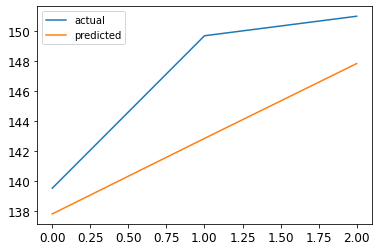

In [72]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [73]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6212
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5697
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5349
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5063
Epoch 5/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4811
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 0.4580
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.4366
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 0.4163
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3968
Epoch 10/30
1/1 [==============================] - 0s 15ms/step - loss: 0.3781
Epoch 11/30
1/1 [==============================] - 0s 12ms/step - loss: 0.3600
Epoch 12/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3422
Epoch 13/30
1/1 [==============================] - 0s 14ms/step 

### Predictions

In [75]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 252ms/step


In [76]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [77]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [78]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369
0,simple RNN,9.116649
0,Simple RNN with more layers,16.848684
0,LSTM with one layer,18.971611
0,LSTM with more layers,19.870879
0,GRU with more layers,15.250943


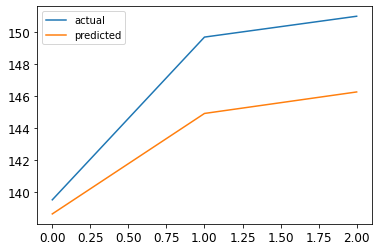

In [79]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [80]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [81]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.5604
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5344
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5101
Epoch 4/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4865
Epoch 5/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4650
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4442
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4237
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4032
Epoch 9/30
1/1 [==============================] - 0s 12ms/step - loss: 0.3824
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3617
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3408
Epoch 12/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3199
Epoch 13/30
1/1 [==============================] - 0s 13ms/step - 

### Predictions

In [82]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 262ms/step


In [83]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [84]:
MSE = mean_squared_error(comparison['actual'], comparison['predicted'])

In [85]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Conv1D', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NNN,18.350369
0,simple RNN,9.116649
0,Simple RNN with more layers,16.848684
0,LSTM with one layer,18.971611
0,LSTM with more layers,19.870879
0,GRU with more layers,15.250943
0,Conv1D,12.710550


In [86]:
performance.sort_values(by='MSE')

,model,MSE
0,simple RNN,9.116649
0,Conv1D,12.710550
0,GRU with more layers,15.250943
0,Simple RNN with more layers,16.848684
0,Normal NNN,18.350369
0,LSTM with one layer,18.971611
0,LSTM with more layers,19.870879


On comparing all the models Simple RNN has the lowest MSE wchich is the better performing model.
